In [1]:
import sys
sys.path.insert(0,'/home/antonio/Desktop/VIRMAT/2Danalysis/twod-analysis-kit/twodanalysis')
from BioPolymer2D import BioPolymer2D # type: ignore
# from twodanalysis import BioPolymer2D # type: ignore
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nglview as nv


/home/antonio/Desktop/VIRMAT/2Danalysis/twod-analysis-kit/twodanalysis/BioPolymer2D.py:488: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Radius of gyration ($\mathrm{\AA}$)')


#  **BioPolymer2D** class

BioPolymer2D is an object-oriented class based on MDAnalysis that is part of the twod_analysis toolkit package that is initialized by an MDAnalysis Universe or Atom Group, enabling the use of universes and Atom groups that have been previously initialized to be used for built-in MDAnalysis methods.

Tipically, polymeric biomolecules (biopolymers), such as proteins, peptides and nucleic acid, interactions are studied in 3D since the dynamics and interactions are present in all degrees of freedom. When the biopolymer is interacting with a flat 2-dimentional surface, this approach could give results that are hard for interpretation by overstimating dynamics that are far from the adsorption regime or dynamics on the Z directions. In this class, we propose four analysis funtions that will be focused in retrieving detailed information on the adsorption mechanisms of biopolymers onto surfaces:

1. **Polar Histogram analysis**:
Polar histogram of residues from the center of mass of a given selection of atoms. This type of analysis gives detailed information on the distribution of the positions of the residues over the simulations. These histograms can be interpreted as probability distribution histograms (PDF) of the residues, and therefore the width of the histogram is an indicative of the flexiblity of the residues. This analysis has been previously used in Supplementary information of [Bosch, A.M.,et al](https://pubs.acs.org/doi/10.1021/acs.jcim.4c00460).

2. **KDE density contour analysis**:
Using the seaborn.kde_plot function makes a contour plot of selected residues from a selection of residues using only a set of adsorpbed to the surface frames of the simulation, and is able to compute the areas of a given contour level. Similarly to the polar plot, the area of the contour plots can give information on the flexibility of the residue, but also give insight on the the specificity of the interactions depending on the chosen level of the contour plot that is selected to compute the area. 

Analogue to polar analysis, these KDE position density contours are 2-dimentional probability distribution histograms. Therefore, by measuring the area of diferent contour levels you can measure diferent properties if the interaction, for instance,
*  By computing th area of the lower contour levels, you can sample all the available spaces states in the X and Y axis which is an indicative of how flexible ("entropic") is the system. That is, higher area values at the lowest contour levels shows more flexibility. 

* On the other hand, by computng the area of higher contour level, you can sample the available space state of the peak of the distribution, giving insight on the specificity of the interaction. That is, lower area values at the highest contour levels show more specificity. 
3. **Parallel and perpendicular radii of gyration**:
Computes the standard 3D ($R_g$), parallel ($R_{g\parallel}$) and perpendicular ($R_{g\perp}$) radii of gyration.

$$R_{\textrm{g}}= \sqrt{ \frac{1}{m_T}\sum_{i} m_{i}\left[ (x_i-x_{\textrm{CM}})^2+(y_i-y_{\text{CM}})^2+(z_i-z_{\text{CM}})^2\right]}$$
$$R_{\textrm{g}\parallel}= \sqrt{ \frac{1}{m_T}\sum_{i} m_{i}\left[ (x_i-x_{\textrm{CM}})^2+(y_i-y_{\text{CM}})^2\right]}$$
$$R_{\textrm{g}\perp} = \sqrt{\frac{1}{m_T}\sum_{i} m_{i} (z_i-z_{\text{CM}})^2,}$$

where ${\bf R}_{\textrm{CM}}=(x_{\textrm{CM}}$, $y_{\textrm{CM}}$, $z_{\textrm{CM}})$ is the position of the center of mass, $m_{i}$ the mass of each residue and $m_T$ the total mass of the residues.

The parallel and perpendicular radii of gyration gives structural information during the adsorption,

* $R_{g\parallel}$: Gives information on how the biopolymer is expanded by the sides (parallel to the surface). 

* $R_{g\perp}$ : Gives information on how the biopolymer is streched or flattened.

and, if compared to native environment, it can give insight on the deformation of the biopolymer due to the surface presence, as was done in [Bosch, A.M.,et al](https://pubs.acs.org/doi/10.1021/acs.jcim.4c00460), where we compare these values for the open SARS-CoV2 RBD onto polarizable bilayers to its native ACE2 enzyme.

Note that $R_{g\parallel}$ and $R_{g\perp}$ are not necesarilly correlated since secondary strucutures as biomolecules have cavities. This is specilly true for proteins.

When these values are computed, there the posibility to generate a plot indicating $\langle R_{g\perp}^2 \rangle /\langle R_{g\parallel}^2 \rangle$ ratio, which is relevant in polymer theory ([S. Poblete et al](https://pubs.acs.org/doi/10.1021/acsomega.1c04774) and [S. Egorov et al](https://pubs.aip.org/aip/jcp/article-abstract/144/17/174902/194646/Semiflexible-polymers-under-good-solvent?redirectedFrom=fulltext)) when studying polymer adsorption, and a $R_{g\perp}$ vs $R_{g\parallel}$ plot similar to Figure 1.

<div style="text-align: center;">
    <img src="images/TOC12_Final.png" width="600" alt="FIGURE 1" />
    <p><b>Figure 1:</b> Figure extracted from <a href="https://pubs.acs.org/doi/10.1021/acs.jcim.4c00460" target="_blank">Bosch, A.M., et al.</a> 
    It shows a plot similar to the one generated by the toolbox, with some graphical representation of the 
    \( R_{g\parallel} \) and \( R_{g\perp} \) .</p>
</div>




4. **H-bonds per residues**:

In order to further understand the present interactions between surfaces and the biopolymer, this tool computes the Hbonds of each residue in a selection of residues during the simulation. As an output you will have a table sorted from the residues with most to the least Hbonds, and there is the posibitly to have a plot show the center of mass of the residues from a bottom perspective. This tool uses MDAnalysis protocol to compute Hbonds which is a geometric approach of Hbond computation, and uses MDAnalysis default parameters to compute them. 



# Case of study 4: Closed SARS-CoV2 RBD with glycans in highly hydrophilic surfaces with **BioPolymer2D** class

## System

In this tutorial, we will be using the BioPolymer2D to analyze the adsorption mechanisms of a protein onto a surface. In this case, we will be using the SARS-CoV2 RBD with glycans where we will be able to compare flexibility of Glycans vs flexbility of protein. It is expected glycans to be more flexible than proteins since protein have secondary structures that reduces the degrees of freedom of the atoms. 


By running the cell below, we can see our system that is given by the SARS-CoV2 RBD in black, the glycan in red and the polarizable bilayer (PBL) in yellow as shown in Figure 2.

<div style="text-align: center;">
    <img src="images/System.png" width="400" alt="FIGURE 2" />
    <p><b>Figure 2:</b> System that with be used for the tutorial. SARS-CoV2 RBD is shown in black, the glycan in red and the polarizable bilayer (PBL) in yellow. </p>
</div>


In [2]:
trj_path='/home/antonio/Desktop/VIRMAT/2Danalysis/twod-analysis-kit/twodanalysis/data/'
u=mda.Universe(f"{trj_path}md_nowater.tpr",f"{trj_path}trajout.xtc")
sel = u.select_atoms("resid 193-200 or protein")

In [3]:

# view=nv.show_mdanalysis(u)
# # Selection of molecules in Polariable Bilayer (PBL)
# resname_dol = u.select_atoms("resname DOL")
# # Selection of molecules in protein
# prot = u.select_atoms("protein")
# # Selection of molecules in Glycan
# glyc = u.select_atoms("resname BGLCNA AFUC BMAN AMAN")
# # Contact=u.select_atoms('resid 4-15 or resid 34-45 or resid 104-117 or resid 170-176')
# view.clear_representations()
# view.add_representation('surface', selection=resname_dol.atoms.indices,color='yellow', opacity=0.9, probeRadius=2)
# # view.add_representation('ball+stick', selection=Contact.atoms.indices,color='green', radiusScale=2)
# # view.add_representation('cartoon', selection=prot.atoms.indices,color='darkgray')
# view.add_representation('cartoon', selection=prot.atoms.indices,color='black')
# view.add_representation('licorice', selection=glyc.atoms.indices,color='red', radius=0.5)

# view.layout.width = '500px'  # Set the width
# view.layout.height = '400px'  # Set the height

# view.center()
# Display the view
# view

Although, the whole trajectory can be seen in the latter output, it is not recommended since reproduction will be slow. In such case you want to see the whole trajectory, uncomment cell below.

In [4]:

### Uncomment if you want to see the trajectory
# t = nv.MDAnalysisTrajectory(u.select_atoms('protein or resname DOL or resname AFUC BMAN AMAN BGLCNA'))
# w = nv.NGLWidget(t)
# w

## Initializing object

Now, that we have initialized a Universe or an AtomGroup, we will initialize our BioPolymer2D object. This can be initialized either with a MDAnalysis AtomGroup or a Universe. The class has two main attributes, universe and atom_group. If initialized with a Universe, the attribute atom_group will be the AtomGroup of the whole system. For instance:

In [5]:
ag_analysis = BioPolymer2D(u)
ag_analysis.system_name='Omicron PBL1'
ag_analysis.INFO()

=== UNIVERSE INFO ===
  N atoms: 24616
  N residues: 853
  N segments: 3
  Time : 0.0-300.0ns dt=1.0ns
  N frames : 300
=== SELECTION INFO ===
  N selected atoms: 24616
  N selected residues: 853
  N selected segments: 3


Note that Selection info has the same number of atoms and residues that Universe info.

If the class is initialized with a selection, we will get different selection with the Universe:

In [6]:
ag_analysis = BioPolymer2D(sel)
ag_analysis.system_name='Omicron PBL1'
ag_analysis.INFO()

=== UNIVERSE INFO ===
  N atoms: 24616
  N residues: 853
  N segments: 3
  Time : 0.0-300.0ns dt=1.0ns
  N frames : 300
=== SELECTION INFO ===
  N selected atoms: 3227
  N selected residues: 200
  N selected segments: 1


Attribute system_name is simply to set the name of the system. This will be usefull for doing legends and title during the analysis plots if there is more than one system to be analyzed.

Note that by default, the object is set to compute all the further calculation over all the frames in the universe with attributes `self.startT`, `self.endT` and `self.stepT` set to have the time length of the whole universe. This can be changed by overloading these attributes, as follows:

In [7]:
ag_analysis.startT=100
ag_analysis.endT=200
ag_analysis.stepT=0.4
ag_analysis.INFO()

=== UNIVERSE INFO ===
  N atoms: 24616
  N residues: 853
  N segments: 3
  Time : 100-200ns dt=0.4ns
  N frames : 250
=== SELECTION INFO ===
  N selected atoms: 3227
  N selected residues: 200
  N selected segments: 1


It must be warned that if `stepT` is smaller than initial Universe, you will have problems during the analysis calculations. 

If we now compute the positions of the residues with:

In [8]:
ag_analysis.getPositions()
print(ag_analysis.startF,ag_analysis.endF)
ag_analysis.pos.shape

Getting positions from frame 250 to 500 with steps of 1
250 500


(250, 200, 4)

We get a numpy array of size (`ag_analysis.endF` -`ag_analysis.startF`, `Nresidues` ,`pos` \<t,x,y,z\> ). If we want to compute the positions of atoms instead of the center of mass of residues, you can get use:

In [9]:
ag_analysis.getPositions(pos_type='all')
print(ag_analysis.startF,ag_analysis.endF)
ag_analysis.pos.shape

Getting positions from frame 250 to 500 with steps of 1
250 500


(250, 3227, 4)

Note that the calculation of `getPosition` will be a typical first step after initializing the object. It has not added as a default calculation when initialize to be able to customize the this calculations as previouly mentioned and give the liberty to assign positions to the object if they were previously computed, although this must be done very carefully, to consitently set other attributed of the object. 

The`getPositions` method that by default will store the positions in place in the object attribute `self.pos`:

In [10]:

ag_analysis = BioPolymer2D(sel)
ag_analysis.system_name='Omicron PBL1'
ag_analysis.getPositions()
print(ag_analysis.startF,ag_analysis.endF)
ag_analysis.pos.shape

Getting positions from frame 0 to 300 with steps of 1
0 300


(300, 200, 4)

If we do not want to store the positions as an attribute of the object, we can simply set `inplace=False`. This way we could use this function to compute the positions of any selection of the universe without overwriting the `self.pos` attribute of the object. For instance:

In [11]:
glycan_extreme_residues_pos=ag_analysis.getPositions(select='resid 198 200', inplace=False)
print(glycan_extreme_residues_pos.shape, "residues computes with inplace=False")
print(ag_analysis.pos.shape, "residues computes with inplace=True")

Getting positions from frame 0 to 300 with steps of 1
(300, 2, 4) residues computes with inplace=False
(300, 200, 4) residues computes with inplace=True


Or even compute the positions of all atoms:

In [12]:
all_atoms_pos=ag_analysis.getPositions(select='resid 198 200', inplace=False)
print(all_atoms_pos.shape, "residues computes with inplace=False")
print(ag_analysis.pos.shape, "residues computes with inplace=True")

Getting positions from frame 0 to 300 with steps of 1
(300, 2, 4) residues computes with inplace=False
(300, 200, 4) residues computes with inplace=True


## Polar Analysis 

Now we will reinitialize our object and compute the positions of the selection to compute the **polar histograms of residues** by using our previusly selected residues (all residues in the protein+glycan), and we will call the system "Omicron PBL1", since we are working with the Omicron variant of the SARS-COV2 RBD with a PBL of polarity 1 (completly hydrophilic).

In [13]:

ag_analysis = BioPolymer2D(sel)
ag_analysis.system_name='Omicron PBL1'
ag_analysis.getPositions()
print(ag_analysis.startF,ag_analysis.endF)
ag_analysis.pos.shape

Getting positions from frame 0 to 300 with steps of 1
0 300


(300, 200, 4)

Since the PBLs gives a certain height to the positions we will compute the positions of the oxigens that are on top of the decanol surface of the PBLs, compute the mean a substact this value to the positions of the residues of the selection:

In [14]:
dol_pos=ag_analysis.getPositions(select='resname DOL and name O1 and prop z > 16', inplace=False)
print(dol_pos.shape)
mean_dol_pos=dol_pos.mean(axis=(0,1))
ag_analysis.surf_pos=mean_dol_pos[1:]
mean_dol_pos


Getting positions from frame 0 to 300 with steps of 1
(300, 324, 4)


array([149.5       ,  41.72882669,  36.97127891,  26.97194334])

In [15]:
z_mean_dol_pos=mean_dol_pos[3]
print(ag_analysis.pos.mean(axis=(0,1)))
ag_analysis.pos[:,:,3]=ag_analysis.pos[:,:,3]-z_mean_dol_pos
print(ag_analysis.pos.mean(axis=(0,1)))


[149.5         41.53237727  36.73552365  55.88463467]
[149.5         41.53237727  36.73552365  28.91269134]


We have confirmed that the positions in Z axis have been subtracted, so the referece height is the surface. 

Now that we have computed the positions, we can start our analysis using the `PolarAnalysis` method. The Polar analysis method will take the object's selection to set the center of the polar histogram, and plot the histograms selected in `select_res` parameter. In the following case, we will take seven protein residues in the contact region and compare their histogram width with two glycan residues (198-BGLCNA and 200-BGLCNA). Reference of the positioning of these residues below with residue colors corresponding with the Polar histograms and the KDE Analysis (next section).

**Note:** Positioning of residues in Polar histograms (and KDE Analysis) correspond to a *top view* of the structure.   

In [16]:

view=nv.show_mdanalysis(u)
# Selection of molecules in Polariable Bilayer (PBL)
resname_dol = u.select_atoms("resname DOL")
# Selection of molecules in protein
prot = u.select_atoms("protein")
# Selection of molecules in Glycan
glyc = u.select_atoms("resname BGLCNA AFUC BMAN AMAN")
# Contact=u.select_atoms('resid 4-15 or resid 34-45 or resid 104-117 or resid 170-176')
view.clear_representations()
# view.add_representation('surface', selection=resname_dol.atoms.indices,color='yellow', opacity=0.9, probeRadius=2)
view.add_representation('cartoon', selection=prot.atoms.indices,color='darkgray',opacity=0.3, smoothness=30,smoothSheet=True)
view.add_representation('licorice', selection=glyc.atoms.indices,color='darkgray', radius=0.5,opacity=0.3)

residues=[8, 12,40,45,111,115,173,198,200]
colors=['blue', 'orange', 'lightgreen', 'red', 'purple','brown', 'pink','gray','darkgreen']
for c,r in zip(colors,residues):
    res = u.select_atoms(f"resid {r} and (name CA or name C5)")
    view.add_representation('ball+stick', selection=res.atoms.indices,color=c, radiusScale=5)

view.layout.width = '500px'  # Set the width
view.layout.height = '400px'  # Set the height

view.center()
# Display the view
view

NGLWidget(layout=Layout(height='400px', width='500px'), max_frame=300)

Computing Polar Analysis from frame 0 (t=0.0ns) to 300 (t=300.0ns) 
Getting positions from frame 0 to 300 with steps of 1
<ResidueGroup [<Residue ASP, 8>, <Residue ASN, 12>, <Residue LEU, 40>, <Residue THR, 45>, <Residue ASP, 111>, <Residue SER, 115>, <Residue GLY, 173>, <Residue BGLCNA, 198>, <Residue BGLCNA, 200>]>
(300, 9, 4)
(300,)
There are 224  frames < 15 A in Z
Taking 900 closest frames to surface...
(224, 9, 4)
(9, 4) MeanPos


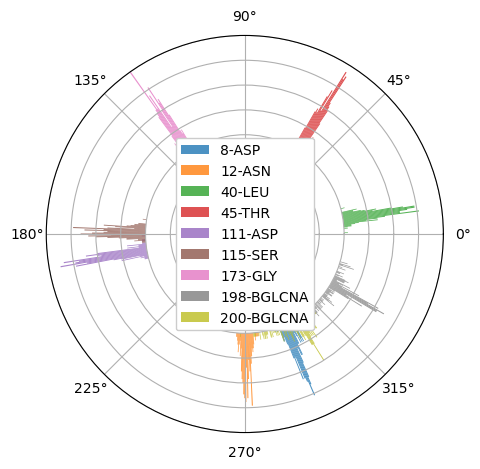

In [17]:
select_res='resid 198 200 12 8 40 45 111 115 173'
zlim=15
Nframes=900
hist_arr,pos_hist=ag_analysis.PolarAnalysis(select_res,Nframes, #sort=[1,2,3,4,5,6,7,8,0],
                                            zlim=zlim,control_plots=False,plot=True)

At first sight, we can notice that glycan residues 198 and 200 show an increse of width respect to protein residues, as was expected. 

## Residue KDE contour plots

In general, for the Contour Analysis, we will want to center these contour is residues that are in contact with the surface. For this reason, we will define a new object with only residues in the contact region.


In [18]:

sel_in_Contact=u.select_atoms('resid 4-15 or resid 34-45 or resid 104-117 or resid 170-176')
Contact_region = BioPolymer2D(sel_in_Contact)
Contact_region.system_name='Contact region'# (omicron RBD)'
Contact_region.getPositions()
print(Contact_region.startF,Contact_region.endF)
Contact_region.surf_pos=ag_analysis.surf_pos
Contact_region.pos[:,:,3]=Contact_region.pos[:,:,3]-z_mean_dol_pos # (t,x,y,z)
print(Contact_region.pos.mean(axis=(0,1)))

Getting positions from frame 0 to 300 with steps of 1
0 300
[149.5         40.96924388  36.2414914   17.25024044]


We compute the KDE Contours using `getKDEAnalysis` with the  same `zlim` and `Nframes` values as ther polar Histograms for consistency. It will be stored in `kde_analysis.kdeanalysis.kde`.

In [19]:
paths=Contact_region.getKDEAnalysis(15,Nframes,)
print(Contact_region.kdeanalysis.kde)

(300,)
There are 166  frames < 15 A in Z
Taking 900 closest frames to surface...
(166, 45, 4)
(7470, 4)
There are 10 levels in the KDE.
Axes(0.125,0.11;0.775x0.77)


 Then we will compute the Contour plots of multiple residues using the `KDEAnalysisSelection` method to compute the Contour paths of all the residues. Before this, we use `plotPathsInLevel` to plot the paths of contour level 0 (the outermost level) as a reference of the position of our selection `sel_for_kde_analysis`. Note that if you are not interested of showing the plot, but only on computing the paths you can uncomment `plt.close()` and comment `plt.show()` 

Getting positions from frame 0 to 300 with steps of 1
[149.5         43.23445015  32.82221713  16.33342782]
(300,)
There are 224  frames < 15 A in Z
Taking 900 closest frames to surface...
(224, 9, 4)


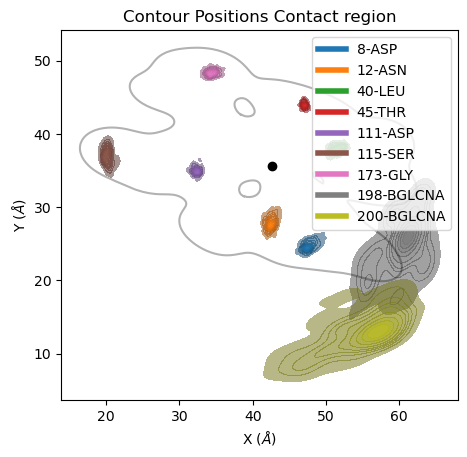

In [20]:
Contact_region.plotPathsInLevel(paths,0,show=False)
all_residues_paths,residues_in_contour=Contact_region.KDEAnalysisSelection('resid 198 200 12 8 40 45 111 115 173',Nframes,15,show=False,legend=True)
plt.show()
# plt.close()

It can be noted, once again, that area of the glycans residues are more larger that proteic residues. 

In order to have a more quantitative analysis, now that the KDE contour paths of the residues are computed, we can procede to  calculate their areas using `getAreas` method for each residue. As follows, we can make a table with the total area of the outermost contour level (level 0) for each residue .


In [21]:
data=[]
for p in range(len(all_residues_paths)):
    areas=BioPolymer2D.getAreas(all_residues_paths[p],0,getTotal=True)
    data.append([residues_in_contour.residues[p].resid,residues_in_contour.residues[p].resname,areas])
df=pd.DataFrame(data=data, columns=["ResIDs", "Resnames", "Area (angs^2)"])
df

Area of the outline 0: 9.317884619339578
Area of the outline 1: -5.614748968837008
Area of the outline 0: 9.286569711150845
Area of the outline 1: -5.738299015959572
Area of the outline 0: 7.12868247622557
Area of the outline 1: -4.333221285183323
Area of the outline 0: 2.4671763101330395
Area of the outline 1: -1.8067833904350192
Area of the outline 0: 4.487256360215262
Area of the outline 1: -2.769615715040856
Area of the outline 2: 0.10858153618915223
Area of the outline 0: 10.912433740258194
Area of the outline 1: -6.204903116617331
Area of the outline 0: 5.65023572392036
Area of the outline 1: -3.318907809988974
Area of the outline 0: 152.37746989683748
Area of the outline 1: -2.564542473215866
Area of the outline 2: -93.75881680121724
Area of the outline 0: 170.27752197121038
Area of the outline 1: -99.48829701228976
Area of the outline 2: -1.8462039058825384


,ResIDs,Resnames,Area (angs^2)
0,8,ASP,3.703136
1,12,ASN,3.548271
2,40,LEU,2.795461
3,45,THR,0.660393
4,111,ASP,1.826222
5,115,SER,4.707531
6,173,GLY,2.331328
7,198,BGLCNA,56.054111
8,200,BGLCNA,68.943021


These results can quantitatively confirme that KDE contour plots of the glycans have a larger area respect to the proteic residues, confirming that the glycan are indeed more flexible than the protein.

## Parallel and perpendicular radii of gyration

Now, that we have seen the flexibility of the protein and glycans, we would like to have some insights of the deformation of the protein during the adsorption. To this matter, we compute the parallel and perpendicular radii of gyration over the contact region and the glycan. We initialize the glycan object.

In [22]:
sel_glyc=u.select_atoms("resname AFUC BMAN AMAN BGLCNA")
glycan=BioPolymer2D(sel_glyc)
glycan.getPositions()
glycan.surf_pos=Contact_region.surf_pos
glycan.pos[:,:,3]=glycan.pos[:,:,3]-glycan.surf_pos[2]
glycan.system_name="Glycan"# (omicron RBD)" 

Getting positions from frame 0 to 300 with steps of 1


We compute the radii of gyration. With `plot=True` we can see the trajectory of the Rgs over time.

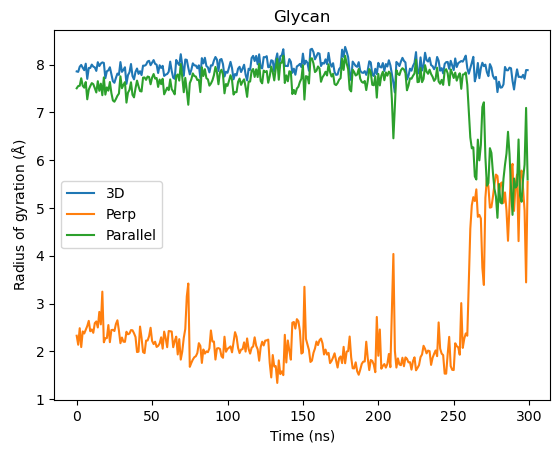

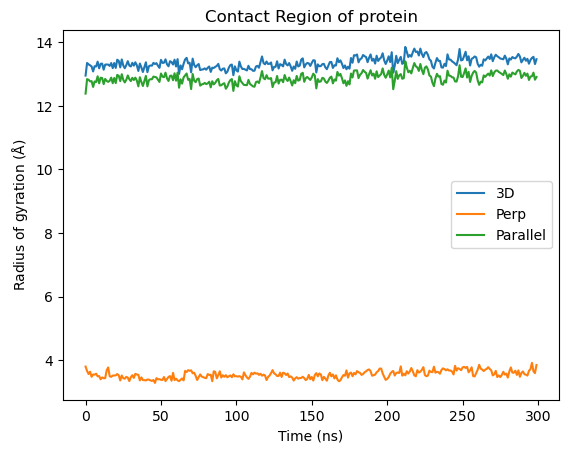

In [23]:
rgs_glycan=glycan.getRgs2D(plot=True)
plt.title("Glycan")
plt.show()
rgs=Contact_region.getRgs2D(plot=True)
plt.title("Contact Region of protein")
plt.show()



Here, we can clearly notice that the protein did not change much its adsorption or deformation, but in the glycan we could notice that there was a change in the adsorption. Was the glycan deformed or did the the protein "fly away" from the surface. As a first insight we could hipotesize the second, since it reached a globular-like radius of gyration. But further analysis would be required to be sure.  **Note that by using the standard 3D Rgs, the glycans would not notice any diference in the last nanosecond of the trajectory**.

Now we wan to see how these values correlate with:

(300, 2)
(300, 2)


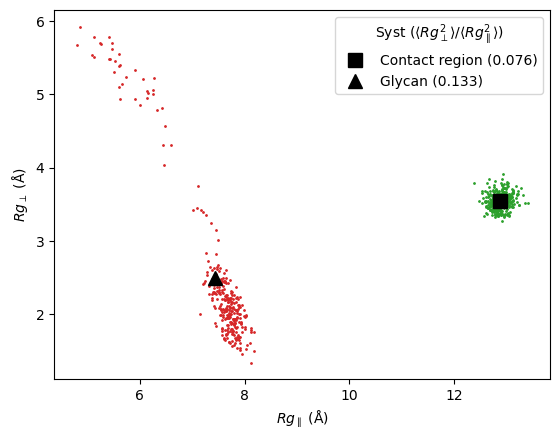

In [24]:

# print(rgs.shape)
ratio=Contact_region.RgPerpvsRgsPar(rgs, 'tab:green',show=False)
ratio_glycan=glycan.RgPerpvsRgsPar(rgs_glycan,'tab:red',marker='^', show=True)

Here we can notice a squeeze-streching dynamic of the glycan (as seen in the trajectory plot), while the protein does not show much changes. Note that the plot also shows the $\langle R_{g\perp}^2 \rangle/\langle R_{g\parallel}^2 \rangle$ value in the legend, which are also returned by the `RgPerpvsRgsPar` method.

In [25]:
print(ratio)
print(ratio_glycan)

0.07573212247468661
0.13253417119439223


## H-bonds per residues

To have some insight fo the interactions of the residues with the surface we will compute the h-bonds of:
1. Glycan with PBL
2. Protein+glycan with PBL
3. Glycan with Protein 

#### 1. Glycan with PBL

We will compute the Glycan residues that has more H-bonds with the PBL computing `getHbonds` and plot them with a referencial contour plot with `plotHbondsPerResidues`. Note that `getHbonds` will compute Hbonds from both the PBL and the glycan, and, in general, we would like to see the top residues with most Hbonds of the biopolymer rather than the residues in the  surface. To this matter, can list the residue names that we **do not** want plotted and listed with the `filter` parameter.

**NOTE:** `update_selections` parameter overwrites the homonimous parameter of the `HydrogenBondAnalysis` method MDAnalysis package. It is set `False` for the notebook, to reduce calculation time but it is set `True` by default, and is suggested to use with this default option. 

(300,)
There are 264  frames < 15 A in Z
Taking 900 closest frames to surface...
(264, 8, 4)
(2112, 4)
There are 10 levels in the KDE.


  0%|          | 0/301 [00:00<?, ?it/s]

/home/antonio/Programs/miniconda3/envs/twod-analysis-kit/lib/python3.12/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:774: UserWarning: No hydrogen bonds were found given angle of 150 between Donor, None, and Acceptor, ((resname DOL and name O1)) or ((resname AFUC and name O2) or (resname AFUC and name O3) or (resname AFUC and name O4) or (resname AMAN and name O3) or (resname AMAN and name O4) or (resname AMAN and name O6) or (resname BGLCNA and name O) or (resname BGLCNA and name O3) or (resname BGLCNA and name O4) or (resname BGLCNA and name O6) or (resname BMAN and name O2) or (resname BMAN and name O4)).
  warnings.warn(


193 194 195 196 197 198 199 200
Getting positions from frame 0 to 300 with steps of 1
  ResIDs ResNames  Count          X          Y          Z
6    199     AMAN  142.0  51.213207  16.478509  38.114720
1    194     AFUC  111.0  48.166904  31.012923  39.595079
4    197     AMAN   74.0  56.717737  23.472184  38.986249
0    193   BGLCNA   60.0  45.188766  25.747239  39.990471
5    198   BGLCNA   56.0  59.473793  25.240245  40.236673


,ResIDs,ResNames,Count,X,Y,Z
6,199,AMAN,142.0,51.213207,16.478509,38.114720
1,194,AFUC,111.0,48.166904,31.012923,39.595079
4,197,AMAN,74.0,56.717737,23.472184,38.986249
0,193,BGLCNA,60.0,45.188766,25.747239,39.990471
5,198,BGLCNA,56.0,59.473793,25.240245,40.236673
7,200,BGLCNA,30.0,53.672949,14.059868,40.434110
3,196,BMAN,9.0,53.360269,20.433724,39.142798
2,195,BGLCNA,8.0,49.905828,24.168591,39.757824


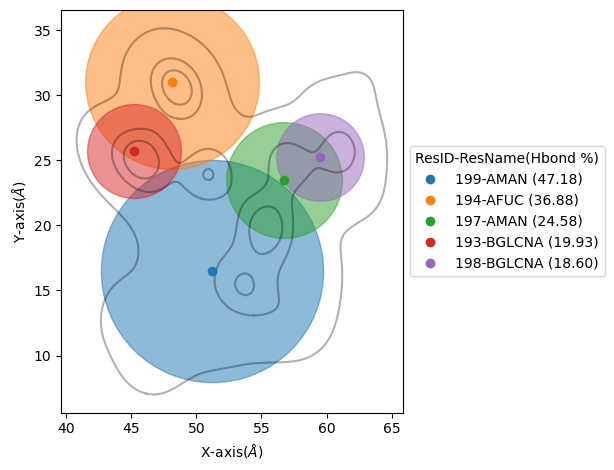

In [26]:

paths=glycan.getKDEAnalysis(zlim,Nframes)
ag_analysis.getHbonds('resname DOL','resid 193-200', update_selections=False,trj_plot=False)
ag_analysis.plotHbondsPerResidues(paths,contour_lvls_to_plot=[0,5,8],top=5, print_table=True,filter=['DOL'])

As an output of `plotHbondsPerResidues`we also get a table with all the residues (with the filter applied) with most Hbonds with their corresponding Hbond count, and their mean center of mass position.

#### 2. Protein+glycan with PBL

Again, we only want to filter the PBL residues, and wil compute the H-bonds of the Protein+Glycan (the whole Biopolymer onto the surface). But now we want to see referential contours of the 2 regions of interest separetly, the protein and the glycan, so this time we concatenate the lists of paths of both of them with the `+` operator and select to plot path 0 (the proteins Contour) and path 9 (first glycan contour), remembering that the contour had only 9 paths, therfore indexed from 0-8. Contour of the protein is marked in black, and contour of the glycan is marked in red.

(300,)
There are 166  frames < 15 A in Z
Taking 900 closest frames to surface...
(166, 45, 4)
(7470, 4)
There are 10 levels in the KDE.
(300,)
There are 264  frames < 15 A in Z
Taking 900 closest frames to surface...
(264, 8, 4)
(2112, 4)
There are 10 levels in the KDE.


  0%|          | 0/301 [00:00<?, ?it/s]

/home/antonio/Programs/miniconda3/envs/twod-analysis-kit/lib/python3.12/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:774: UserWarning: No hydrogen bonds were found given angle of 150 between Donor, None, and Acceptor, ((resname DOL and name O1)) or ((resname AFUC and name O2) or (resname AFUC and name O3) or (resname AFUC and name O4) or (resname ALA and name O) or (resname AMAN and name O3) or (resname AMAN and name O4) or (resname AMAN and name O6) or (resname ARG and name NE) or (resname ARG and name NH1) or (resname ARG and name NH2) or (resname ARG and name O) or (resname ASN and name ND2) or (resname ASN and name O) or (resname ASN and name OD1) or (resname ASP and name O) or (resname ASP and name OD1) or (resname ASP and name OD2) or (resname BGLCNA and name O) or (resname BGLCNA and name O3) or (resname BGLCNA and name O4) or (resname BGLCNA and name O6) or (resname BMAN and name O2) or (resname BMAN and name O4) or (resname CYS and name O) or (resname GLN 

39 108 168 193 194 195 196 197 198 199 200
Getting positions from frame 0 to 300 with steps of 1
   ResIDs ResNames  Count          X          Y          Z
9     199     AMAN  142.0  51.213207  16.478509  38.114720
4     194     AFUC  111.0  48.166904  31.012923  39.595079
0      39      ASN   83.0  56.469901  37.511772  38.590510
7     197     AMAN   74.0  56.717737  23.472184  38.986249
3     193   BGLCNA   60.0  45.188766  25.747239  39.990471
8     198   BGLCNA   56.0  59.473793  25.240245  40.236673
10    200   BGLCNA   30.0  53.672949  14.059868  40.434110
6     196     BMAN    9.0  53.360269  20.433724  39.142798
5     195   BGLCNA    8.0  49.905828  24.168591  39.757824
1     108      ASN    4.0  35.363979  39.359259  39.895711


,ResIDs,ResNames,Count,X,Y,Z
9,199,AMAN,142.0,51.213207,16.478509,38.114720
4,194,AFUC,111.0,48.166904,31.012923,39.595079
0,39,ASN,83.0,56.469901,37.511772,38.590510
7,197,AMAN,74.0,56.717737,23.472184,38.986249
3,193,BGLCNA,60.0,45.188766,25.747239,39.990471
8,198,BGLCNA,56.0,59.473793,25.240245,40.236673
10,200,BGLCNA,30.0,53.672949,14.059868,40.434110
6,196,BMAN,9.0,53.360269,20.433724,39.142798
5,195,BGLCNA,8.0,49.905828,24.168591,39.757824
1,108,ASN,4.0,35.363979,39.359259,39.895711


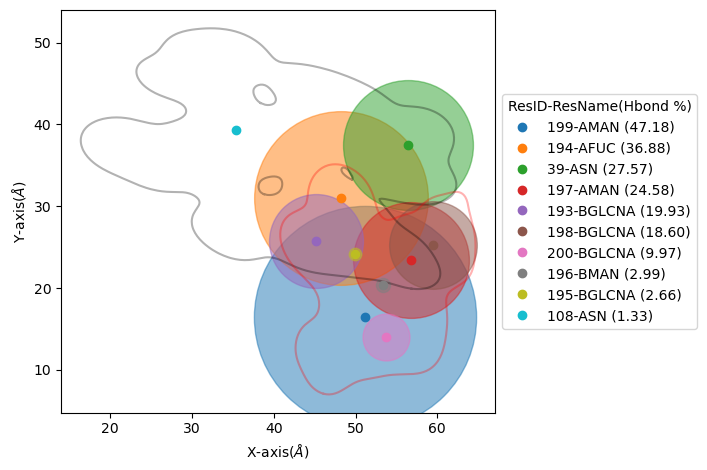

In [30]:

paths=Contact_region.getKDEAnalysis(zlim,Nframes)+glycan.getKDEAnalysis(zlim,Nframes)
ag_analysis.getHbonds('resname DOL','resid 193-200 or protein', update_selections=False,trj_plot=False)
ag_analysis.plotHbondsPerResidues(paths,contour_lvls_to_plot=[0,9],contour_colors=['k','r'],top=10, print_table=True,filter=['DOL'])

It can be clearly noted that the glycan is the main character in the adsorption.

#### 3. Glycan with Protein 

Now, to further understand the Glycans influence over the proteins dynamics we can compute the Hbonds between the glycan and the protein. 

(300,)
There are 264  frames < 15 A in Z
Taking 900 closest frames to surface...
(264, 8, 4)
(2112, 4)
There are 10 levels in the KDE.


  0%|          | 0/301 [00:00<?, ?it/s]

/home/antonio/Programs/miniconda3/envs/twod-analysis-kit/lib/python3.12/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:774: UserWarning: No hydrogen bonds were found given angle of 150 between Donor, None, and Acceptor, ((resname ALA and name O) or (resname ARG and name NE) or (resname ARG and name NH1) or (resname ARG and name NH2) or (resname ARG and name O) or (resname ASN and name ND2) or (resname ASN and name O) or (resname ASN and name OD1) or (resname ASP and name O) or (resname ASP and name OD1) or (resname ASP and name OD2) or (resname CYS and name O) or (resname GLN and name NE2) or (resname GLN and name O) or (resname GLN and name OE1) or (resname GLU and name O) or (resname GLU and name OE1) or (resname GLU and name OE2) or (resname GLY and name O) or (resname HSE and name ND1) or (resname HSE and name O) or (resname ILE and name O) or (resname LEU and name O) or (resname LYS and name O) or (resname PHE and name O) or (resname PRO and name O) or (resname 

2 3 4 8 9 11 12 31 32 33 35 39 40 57 105 193 194 195 197 198 199 200
Getting positions from frame 0 to 300 with steps of 1
   ResIDs ResNames  Count          X          Y          Z
9      33      ASP  108.0  57.505415  29.523484  45.484671
18    197     AMAN   90.0  56.717737  23.472184  38.986249
19    198   BGLCNA   60.0  59.473793  25.240245  40.236673
10     35      SER   23.0  57.925215  33.276242  42.282061
21    200   BGLCNA   22.0  53.672949  14.059868  40.434110
3       8      ASP   21.0  47.805180  25.046372  44.777433
17    195   BGLCNA   19.0  49.905828  24.168591  39.757824
15    193   BGLCNA   15.0  45.188766  25.747239  39.990471
6      12      ASN   14.0  42.514150  28.194653  42.600810
16    194     AFUC    9.0  48.166904  31.012923  39.595079


,ResIDs,ResNames,Count,X,Y,Z
9,33,ASP,108.0,57.505415,29.523484,45.484671
18,197,AMAN,90.0,56.717737,23.472184,38.986249
19,198,BGLCNA,60.0,59.473793,25.240245,40.236673
10,35,SER,23.0,57.925215,33.276242,42.282061
21,200,BGLCNA,22.0,53.672949,14.059868,40.434110
3,8,ASP,21.0,47.805180,25.046372,44.777433
17,195,BGLCNA,19.0,49.905828,24.168591,39.757824
15,193,BGLCNA,15.0,45.188766,25.747239,39.990471
6,12,ASN,14.0,42.514150,28.194653,42.600810
16,194,AFUC,9.0,48.166904,31.012923,39.595079


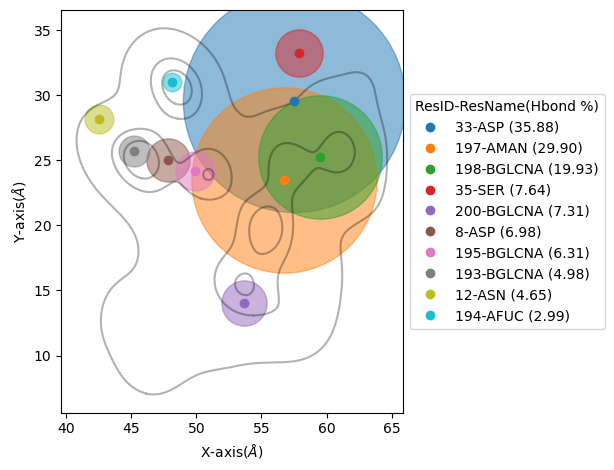

In [28]:

paths=glycan.getKDEAnalysis(zlim,Nframes)
ag_analysis.getHbonds('protein','resid 193-200', update_selections=False,trj_plot=False)
ag_analysis.plotHbondsPerResidues(paths,contour_lvls_to_plot=[0,5,8],top=10, print_table=True)

  0%|          | 0/301 [00:00<?, ?it/s]

/home/antonio/Programs/miniconda3/envs/twod-analysis-kit/lib/python3.12/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:774: UserWarning: No hydrogen bonds were found given angle of 150 between Donor, None, and Acceptor, ((resname DOL and name O1)) or ((resname AFUC and name O2) or (resname AFUC and name O3) or (resname AFUC and name O4) or (resname ALA and name O) or (resname AMAN and name O3) or (resname AMAN and name O4) or (resname AMAN and name O6) or (resname ARG and name NE) or (resname ARG and name NH1) or (resname ARG and name NH2) or (resname ARG and name O) or (resname ASN and name ND2) or (resname ASN and name O) or (resname ASN and name OD1) or (resname ASP and name O) or (resname ASP and name OD1) or (resname ASP and name OD2) or (resname BGLCNA and name O) or (resname BGLCNA and name O3) or (resname BGLCNA and name O4) or (resname BGLCNA and name O6) or (resname BMAN and name O2) or (resname BMAN and name O4) or (resname CYS and name O) or (resname GLN 

(300,)
There are 166  frames < 15 A in Z
Taking 900 closest frames to surface...
(166, 45, 4)
(7470, 4)
There are 10 levels in the KDE.
(300,)
There are 264  frames < 15 A in Z
Taking 900 closest frames to surface...
(264, 8, 4)
(2112, 4)
There are 10 levels in the KDE.
39 108 168 193 194 195 196 197 198 199 200
Getting positions from frame 0 to 300 with steps of 1
   ResIDs ResNames  Count          X          Y          Z
9     199     AMAN  142.0  51.213207  16.478509  38.114720
4     194     AFUC  111.0  48.166904  31.012923  39.595079
0      39      ASN   83.0  56.469901  37.511772  38.590510
7     197     AMAN   74.0  56.717737  23.472184  38.986249
3     193   BGLCNA   60.0  45.188766  25.747239  39.990471
8     198   BGLCNA   56.0  59.473793  25.240245  40.236673
10    200   BGLCNA   30.0  53.672949  14.059868  40.434110
6     196     BMAN    9.0  53.360269  20.433724  39.142798
5     195   BGLCNA    8.0  49.905828  24.168591  39.757824
1     108      ASN    4.0  35.363979  39.3

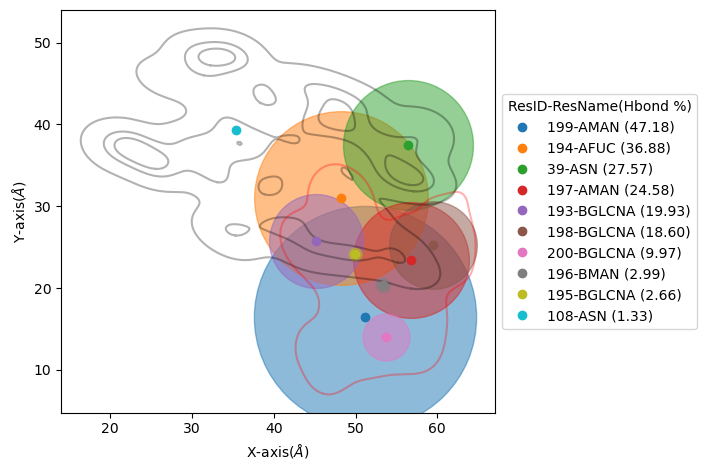

In [34]:
biopol_selection='protein or resname AFUC BMAN AMAN BGLCNA' # Selection of protein and its glycan
surf_selection='resname DOL' # Selection of atoms present in the surfaces
ag_analysis.getHbonds(surf_selection,biopol_selection)
paths=Contact_region.getKDEAnalysis(zlim,Nframes)+glycan.getKDEAnalysis(zlim,Nframes)
ag_analysis.plotHbondsPerResidues(paths,contour_lvls_to_plot=[0,5,8,9],contour_colors=['k']*3+['r'],top=10, print_table=True,filter=['DOL'])
plt.show()